<a href="https://colab.research.google.com/github/Shivaniatre/Analysing-Employee-Performance-for-Hr-Analytics-Using-Python-and-MySQL/blob/main/Analysing_Employee_Performance_for_Hr_Analytics_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the Libraray
import pandas as pd
import numpy as np


In [ ]:
#Load the Dataset

DB = pd.read_csv("/content/Uncleaned_employees_final_dataset.csv")

In [ ]:
#View the Data  First 5 rows of data
DB.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
# Last 5 rows of data
DB.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17416,64573,HR,region_7,Bachelors,f,referred,1,35,5.0,4,1,0,81


In [ ]:
#View the Shape
DB.shape

(17417, 13)

In [ ]:
#Information prints the column header and the data type stored in each column
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [ ]:
#To check Datatype
DB.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

In [ ]:
#Count the number of datapoints
DB.count()

employee_id              17417
department               17417
region                   17417
education                16646
gender                   17417
recruitment_channel      17417
no_of_trainings          17417
age                      17417
previous_year_rating     16054
length_of_service        17417
KPIs_met_more_than_80    17417
awards_won               17417
avg_training_score       17417
dtype: int64

In [ ]:
#Identifying dupliacte rows

DB.duplicated().sum()



2

In [ ]:
#Remove the duplicate row
DB.drop_duplicates(keep =False)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,54192,HR,region_22,Below Secondary,m,other,1,24,2.0,2,0,0,47
17410,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
17411,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81


In [ ]:
#Checking Missing values
DB.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [ ]:
#To remove duplicates rows from coulmns
DB = DB.dropna(subset = ['education'])

In [ ]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16646 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            16646 non-null  int64  
 1   department             16646 non-null  object 
 2   region                 16646 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 16646 non-null  object 
 5   recruitment_channel    16646 non-null  object 
 6   no_of_trainings        16646 non-null  int64  
 7   age                    16646 non-null  int64  
 8   previous_year_rating   15424 non-null  float64
 9   length_of_service      16646 non-null  int64  
 10  KPIs_met_more_than_80  16646 non-null  int64  
 11  awards_won             16646 non-null  int64  
 12  avg_training_score     16646 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.8+ MB


In [ ]:
DB = DB.dropna(subset =['previous_year_rating'])

In [ ]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15424 entries, 1 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            15424 non-null  int64  
 1   department             15424 non-null  object 
 2   region                 15424 non-null  object 
 3   education              15424 non-null  object 
 4   gender                 15424 non-null  object 
 5   recruitment_channel    15424 non-null  object 
 6   no_of_trainings        15424 non-null  int64  
 7   age                    15424 non-null  int64  
 8   previous_year_rating   15424 non-null  float64
 9   length_of_service      15424 non-null  int64  
 10  KPIs_met_more_than_80  15424 non-null  int64  
 11  awards_won             15424 non-null  int64  
 12  avg_training_score     15424 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ MB


In [ ]:
DB.shape

(15424, 13)

In [ ]:
DB.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68


In [ ]:
#Save the data
from google.colab import files
DB.to_csv('Cleaned_Employee_data.csv', encoding = 'utf-8', index = False)
open('Cleaned_Employee_data.csv', mode='r', encoding='utf-8').read()
#download the new clean data
files.download('Cleaned_Employee_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis With SQL

2. List the top 3 departments with the highest average training scores. ( Round average scores up to two decimal places if needed)
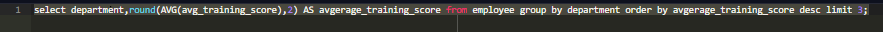


1.Find the average age of employees in each department and gender group. (Round average age up to two decimal places if needed).



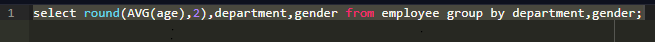

3. Find the percentage of employees who have won awards in each region. (Round percentages up to two decimal places if needed)

image.png

4. Show the number of employees who have met more than 80% of KPIs for each recruitment channel and education level.

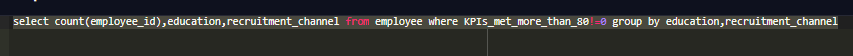



5.Find the average length of service for employees in each department, considering only employees with previous year ratings greater than or equal to 4. ( Round average length up to two decimal places if needed)

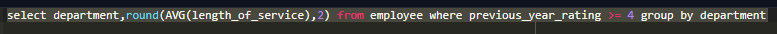



6.List the top 5 regions with the highest average previous year ratings. ( Round average ratings up to two decimal places if needed)

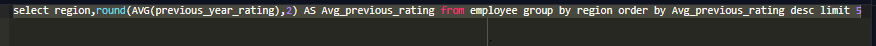


7. List the departments with more than 100 employees having a length of service greater than 5 years.

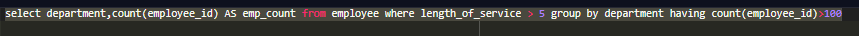

8.Show the average length of service for employees who have attended more than 3 trainings, grouped by department and gender. ( Round average length up to two decimal places if needed)

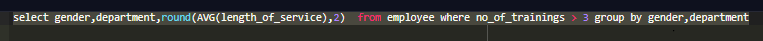



9.Find the percentage of female employees who have won awards, per department. Also show the number of female employees who won awards and total female employees. ( Round percentage up to two decimal places if needed)

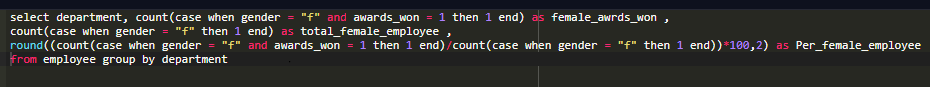



10.Calculate the percentage of employees per department who have a length of service between 5 and 10 years. ( Round percentage up to two decimal places if needed)

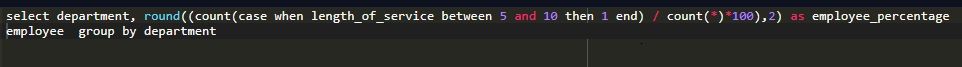

11. Find the top 3 regions with the highest number of employees who have met more than 80% of their KPIs and received at least one award, grouped by department and region.

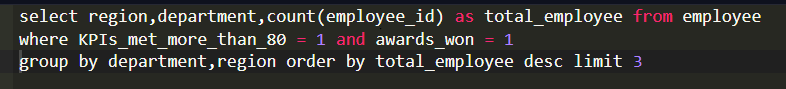

12.Calculate the average length of service for employees per education level and gender, considering only those employees who have completed more than 2 trainings and have an average training score greater than 75 ( Round average length up to two decimal places if needed)

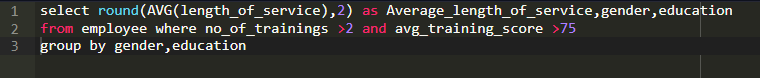

13.For each department and recruitment channel, find the total number of employees who have met more than 80% of their KPIs, have a previous_year_rating of 5, and have a length of service greater than 10 years.

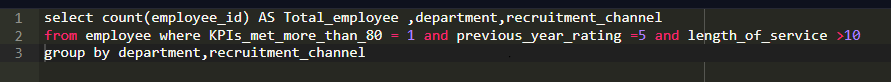

14. Calculate the percentage of employees in each department who have received awards, have a previous_year_rating of 4 or 5, and an average training score above 70, grouped by department and gender ( Round percentage up to two decimal places if needed).

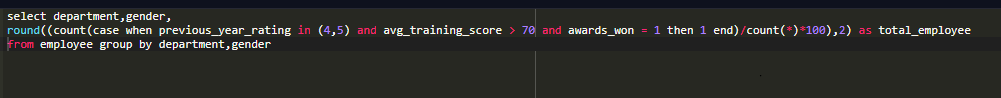

15.List the top 5 recruitment channels with the highest average length of service for employees who have met more than 80% of their KPIs, have a previous_year_rating of 5, and an age between 25 and 45 years, grouped by department and recruitment channel. ( Round average length up to two decimal places if needed).

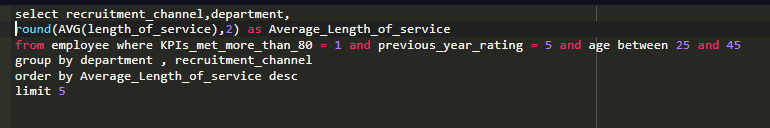

